In [19]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos el dataset
data = pd.read_csv('data.csv')

# Establecemos el ID_Vuelo como indice
data.set_index('ID_Vuelo', inplace=True)

### Planteando el modelo de ML

In [20]:
# Establecemos la variable dependiente: 'bool' y la independiente: ('temperatura','cobertura_nubes')

y = data['bool']
X = data[['temperatura','cobertura_nubes']]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

from sklearn.preprocessing import RobustScaler # StandardScaler para escalar los datos

sc_X = RobustScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier

clt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, random_state= 42)
# max_depth es la profundidad del arbol que permite controlar el overfitting
# random_state es la semilla para el generador de numeros aleatorios

In [23]:
clt.fit(X_Train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [24]:
y_pred = clt.predict(X_Test)

In [25]:
from sklearn.metrics import accuracy_score

print("La precisión del modelo es: ", accuracy_score(y_test,y_pred))

La precisión del modelo es:  0.7803658285949168


In [26]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('la matriz de confusión es: \n', matriz)

la matriz de confusión es: 
 [[5589 1748]
 [1458 5802]]


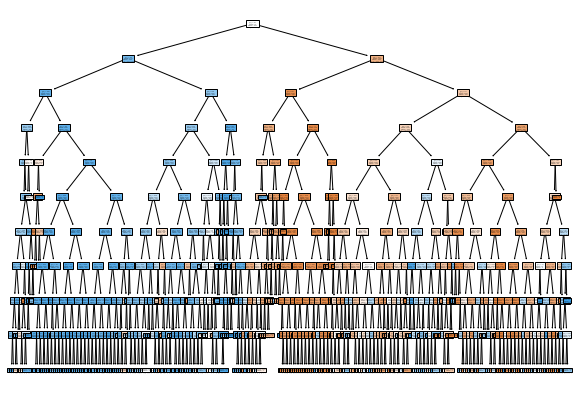

In [27]:
from sklearn import tree
plt.figure(figsize = (10,7))
tree.plot_tree(clt, filled = True)
plt.show()

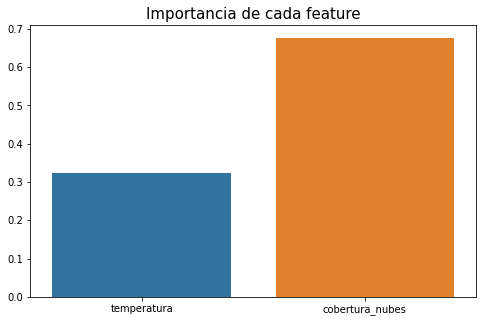

In [28]:
plt.figure(figsize = (8,5))
importances = clt.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

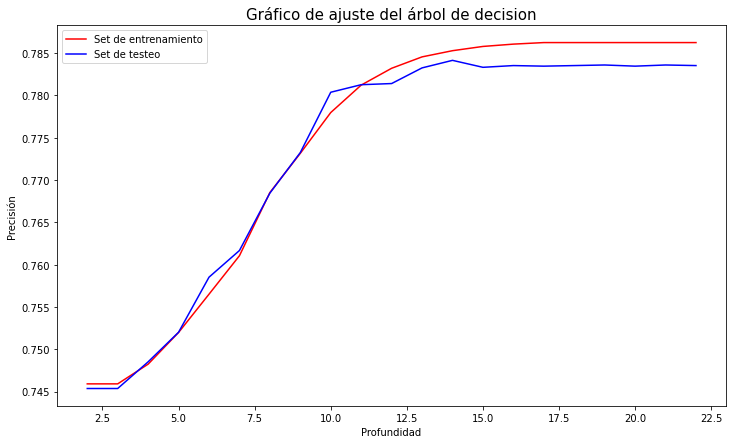

In [29]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(2, 23))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Profundidad')
plt.show()

### Optimizando los hiperparámetros

In [12]:
param_grid = {'criterion': ['gini', 'entropy', 'mse', 'mae', 'poisson'],
              'max_depth': np.arange(2, 20)}

In [13]:
dtc = DecisionTreeClassifier()

from random import random
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(dtc, param_grid=param_grid, refit=True, cv=5, scoring='roc_auc')

model.fit(X_train, y_train)

c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklea

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'mse', 'mae',
                                       'poisson'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='roc_auc')

In [14]:
print("Mejores hiperparámetros: "+str(model.best_params_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')
print('El accuracy del modelo es: ', accuracy_score(y_test, model.predict(X_test)))

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 19}

Mejor Score: 0.8516183406819536

El accuracy del modelo es:  0.7835856682880044


In [15]:
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013611,0.001021,0.006005,0.000894,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.793795,0.793723,0.791928,0.796329,0.803019,0.795759,0.003891,35
1,0.015013,0.001418,0.006205,0.000984,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.804350,0.808180,0.805077,0.807415,0.812591,0.807523,0.002904,33
2,0.016816,0.000750,0.006001,0.000634,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.813535,0.814994,0.810449,0.813795,0.818751,0.814305,0.002682,31
3,0.018211,0.001163,0.005402,0.000482,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.822990,0.822991,0.820811,0.822716,0.826521,0.823206,0.001847,29
4,0.019212,0.000974,0.006206,0.000749,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.830802,0.832357,0.826422,0.829211,0.833037,0.830366,0.002374,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.007607,0.000492,0.000000,0.000000,poisson,15,"{'criterion': 'poisson', 'max_depth': 15}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
86,0.007398,0.001362,0.000000,0.000000,poisson,16,"{'criterion': 'poisson', 'max_depth': 16}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
87,0.007408,0.001350,0.000000,0.000000,poisson,17,"{'criterion': 'poisson', 'max_depth': 17}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,60
88,0.006798,0.001596,0.000000,0.000000,poisson,18,"{'criterion': 'poisson', 'max_depth': 18}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73


In [16]:
#Predecimos en los datos de test con el mejor modelo obtenido
prediction = model.predict(X_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, prediction)

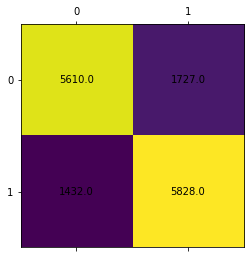

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)

fig, ax = plt.subplots(figsize=(4,5))
ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [18]:
from sklearn.metrics import recall_score
print('Recall:', recall_score(y_test, prediction))

# Reporte de Clasificacion
from sklearn.metrics import classification_report
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Recall: 0.8027548209366391
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      7337
           1       0.77      0.80      0.79      7260

    accuracy                           0.78     14597
   macro avg       0.78      0.78      0.78     14597
weighted avg       0.78      0.78      0.78     14597

